In [ ]:
pip install kaggle


In [ ]:
#uploadin the file which conatins the BIG DATA about the Air Quality
from google.colab import files
uploaded = files.upload()

# Step 2: Check the filename
filename = list(uploaded.keys())[0]
print("Uploaded file:", filename)

# Step 3: Load based on file type
import pandas as pd

if filename.endswith('.csv'):
    df = pd.read_csv(filename)
elif filename.endswith('.xlsx'):
    df = pd.read_excel(filename)
else:
    raise ValueError("Unsupported file type")

# Step 4: Preview the data
df.head()


Saving Air_Quality.csv to Air_Quality (1).csv
Uploaded file: Air_Quality (1).csv


,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2023-01-01 00:00:00+00:00,Brasilia,292,30.15,1.10,23,11.1,15.8,21.158330
1,2023-01-01 01:00:00+00:00,Brasilia,291,28.95,1.15,24,12.4,17.7,20.825000
2,2023-01-01 02:00:00+00:00,Brasilia,289,27.25,1.25,25,13.0,18.5,20.474998
3,2023-01-01 03:00:00+00:00,Brasilia,275,23.70,1.30,28,9.2,13.1,20.074999
4,2023-01-01 04:00:00+00:00,Brasilia,246,19.35,1.25,32,6.8,9.7,19.324999


In [ ]:
# Display top 5 rows
df.head()

# Get dataset shape (rows, columns)
df.shape

# Get column names
df.columns

# Data types of each column
df.dtypes

# Info summary
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52560 non-null  object 
 1   City    52560 non-null  object 
 2   CO      52560 non-null  int64  
 3   NO2     52560 non-null  float64
 4   SO2     52560 non-null  float64
 5   O3      52560 non-null  int64  
 6   PM2.5   52560 non-null  float64
 7   PM10    52560 non-null  float64
 8   AQI     52560 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.6+ MB


In [ ]:
# Count of missing values in each column
df.isnull().sum()

# % of missing values
(df.isnull().sum() / len(df)) * 100


,0
Date,0.0
City,0.0
CO,0.0
NO2,0.0
SO2,0.0
O3,0.0
PM2.5,0.0
PM10,0.0
AQI,0.0


In [ ]:
# Summary statistics for numerical columns
df.describe()

# Summary for categorical columns
df.describe(include='object')


,Date,City
count,52560,52560
unique,8760,6
top,2023-12-31 23:00:00+00:00,Brasilia
freq,6,8760


In [ ]:
# Loop through object columns and print value counts
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())



Value counts for 'Date':
Date
2023-12-31 23:00:00+00:00    6
2023-01-01 00:00:00+00:00    6
2023-01-01 01:00:00+00:00    6
2023-01-01 02:00:00+00:00    6
2023-01-01 03:00:00+00:00    6
                            ..
2023-01-01 12:00:00+00:00    6
2023-01-01 11:00:00+00:00    6
2023-01-01 10:00:00+00:00    6
2023-01-01 09:00:00+00:00    6
2023-01-01 08:00:00+00:00    6
Name: count, Length: 8760, dtype: int64

Value counts for 'City':
City
Brasilia    8760
Cairo       8760
Dubai       8760
London      8760
New York    8760
Sydney      8760
Name: count, dtype: int64


             CO       NO2       SO2        O3     PM2.5      PM10       AQI
CO     1.000000  0.798212  0.503057 -0.084493  0.698211  0.537816  0.521004
NO2    0.798212  1.000000  0.482738 -0.275143  0.606453  0.436620  0.445275
SO2    0.503057  0.482738  1.000000  0.053892  0.581103  0.444977  0.554271
O3    -0.084493 -0.275143  0.053892  1.000000  0.188151  0.284110  0.408491
PM2.5  0.698211  0.606453  0.581103  0.188151  1.000000  0.894778  0.817404
PM10   0.537816  0.436620  0.444977  0.284110  0.894778  1.000000  0.833045
AQI    0.521004  0.445275  0.554271  0.408491  0.817404  0.833045  1.000000


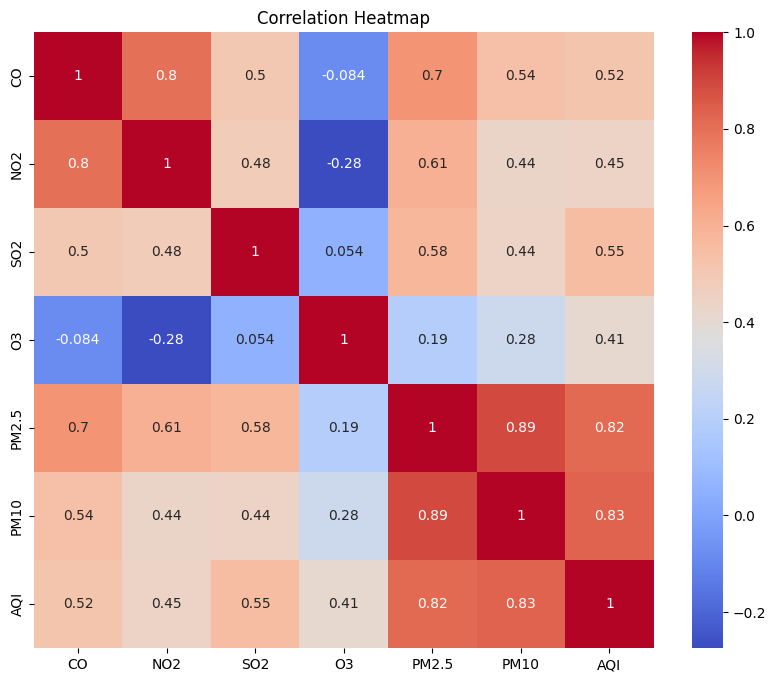

In [ ]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

# Optional: plot the heatmap (if you want visuals)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Example: group by a category and get mean
# Replace 'CategoryColumn' with your actual column name
df.groupby('AQI').mean(numeric_only=True)


,CO,NO2,SO2,O3,PM2.5,PM10
AQI,,,,,,
8.000000,207.000000,11.100000,1.500000,20.0,6.900000,9.700000
8.400000,140.333333,14.766667,3.233333,21.0,5.566667,7.733333
8.491667,196.000000,6.800000,0.850000,20.0,5.800000,8.200000
8.608334,200.000000,7.100000,0.850000,19.0,6.700000,9.500000
8.666667,212.000000,12.550000,0.600000,21.0,4.900000,7.000000
...,...,...,...,...,...,...
186.499970,243.000000,28.300000,24.300000,56.0,27.100000,52.400000
187.383300,235.000000,28.300000,24.200000,71.0,78.900000,224.100000
188.121670,267.000000,32.400000,24.700000,66.0,47.600000,223.600000


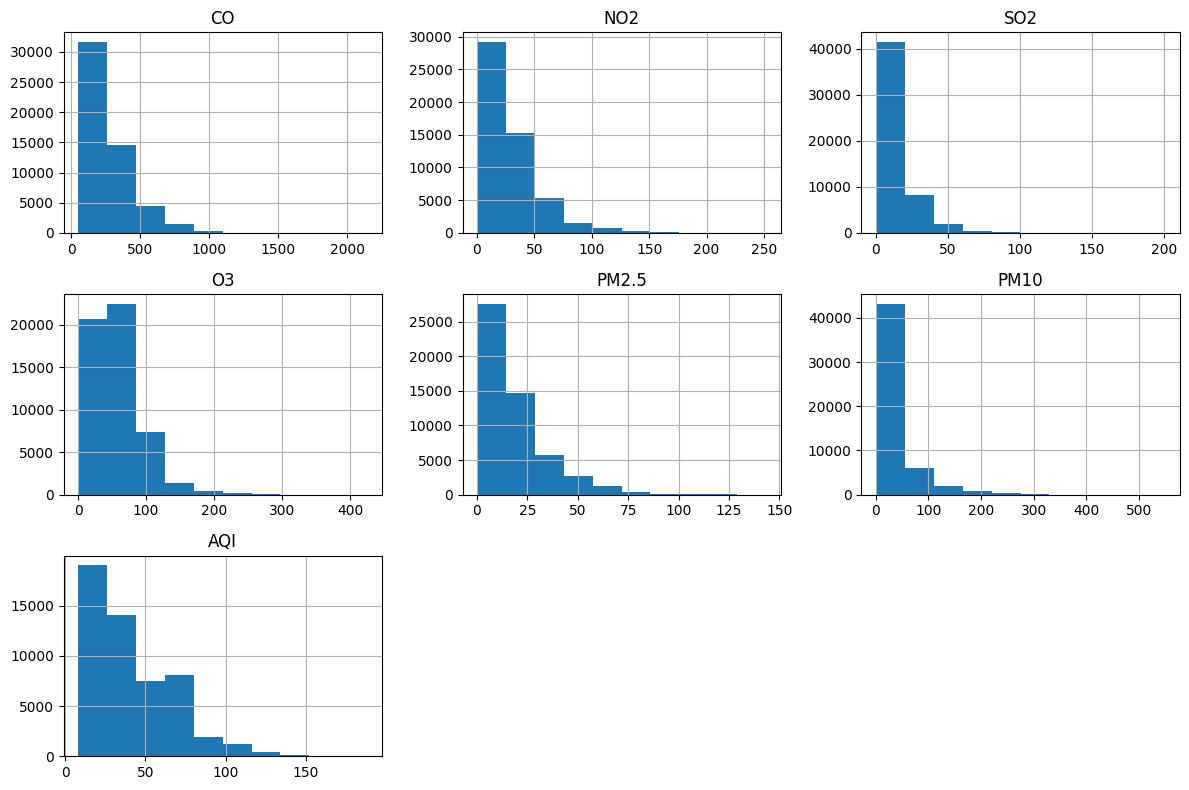

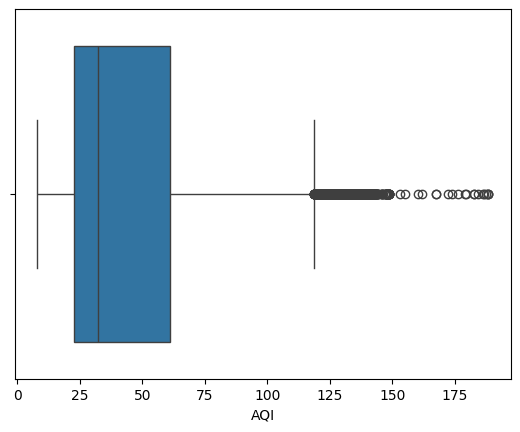

In [ ]:
import matplotlib.pyplot as plt

# Histogram
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Boxplot for a single column
sns.boxplot(x=df['AQI'])
plt.show()
